In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


In [5]:
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.values

In [6]:
n_samples = 1000
X_subset = X_train[:n_samples]
y_subset = y_train[:n_samples]

In [7]:
from sklearn.manifold import MDS

In [8]:
mds = MDS(n_components=2)
train_transformed = mds.fit_transform(X_subset)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


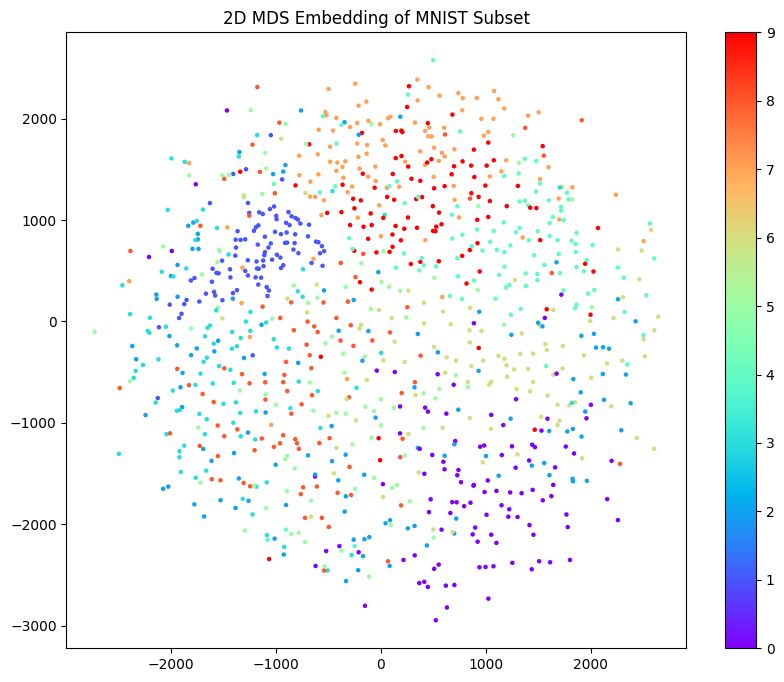

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(train_transformed[:, 0], train_transformed[:, 1], c=y_subset, cmap='rainbow', s=5)
plt.colorbar()
plt.title("2D MDS Embedding of MNIST Subset")
plt.show()

In [10]:
metrics = [True, False]
eps_values = [0.001, 0.01, 0.1]
embeddings = {}


for metric_value in metrics:
    for eps in eps_values:
        embedding = MDS(n_components=2, metric=metric_value, eps=eps)
        train_transformed = embedding.fit_transform(X_subset)
        embeddings[(metric_value, eps)] = train_transformed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: Fu

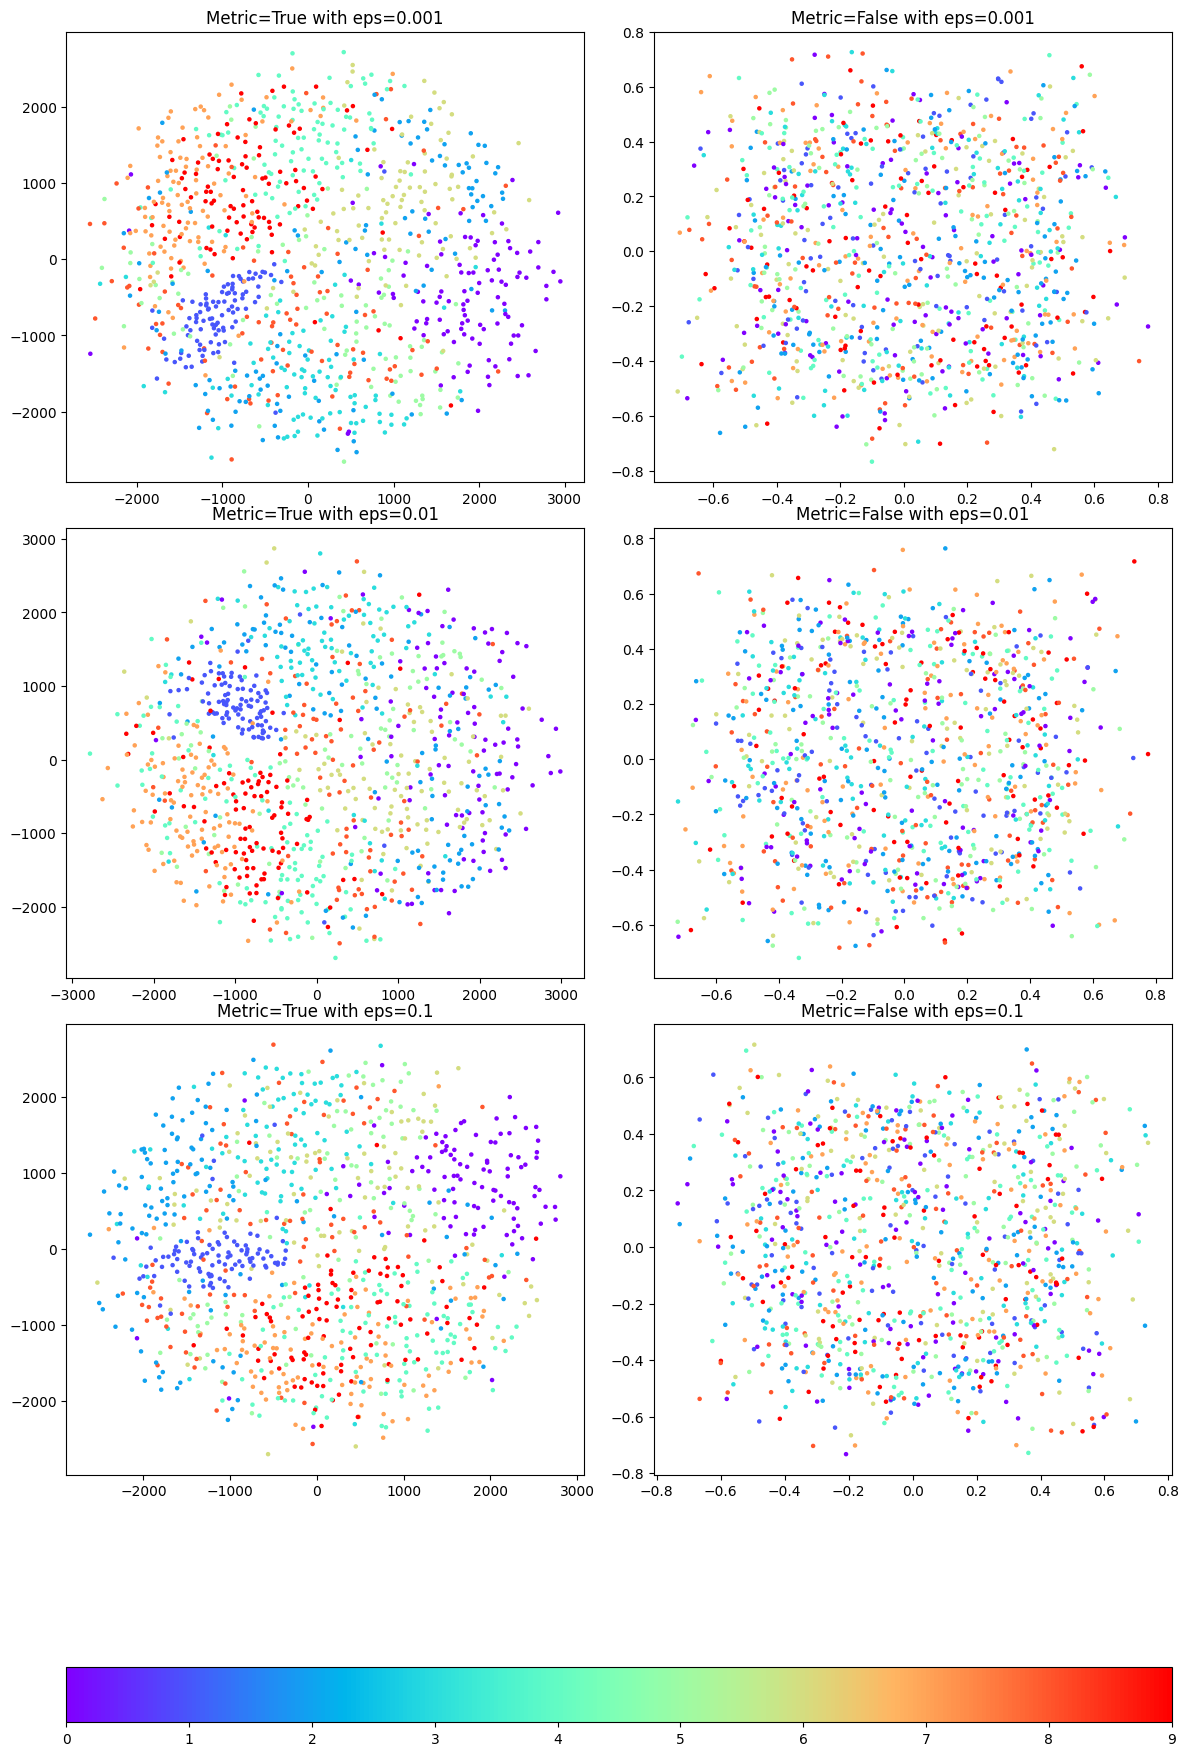

In [11]:
fig, axes = plt.subplots(nrows=len(eps_values), ncols=len(metrics), figsize=(12, 20))

for j, eps in enumerate(eps_values):
    for i, metric_val in enumerate(metrics):
        data = embeddings[(metric_val, eps)]
        ax = axes[j, i]
        sc = ax.scatter(data[:, 0], data[:, 1], c=y_subset, cmap='rainbow', s=5)
        
        metric_str = "Metric=True" if metric_val else "Metric=False"
        ax.set_title(f'{metric_str} with eps={eps}')

plt.tight_layout()
plt.colorbar(sc, ax=axes.ravel().tolist(), orientation='horizontal', pad=0.1)
plt.show()

In [12]:
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D

In [13]:
n_neighbors_values = [10, 20, 30, 40]
n_components_values = [1, 2, 3]
embeddings = {}

for n_neighbors in n_neighbors_values:
    for n_components in n_components_values:
        iso = Isomap(n_neighbors=n_neighbors, n_components=n_components)
        subset_train_transformed = iso.fit_transform(X_subset)
        
        embeddings[(n_neighbors, n_components)] = subset_train_transformed


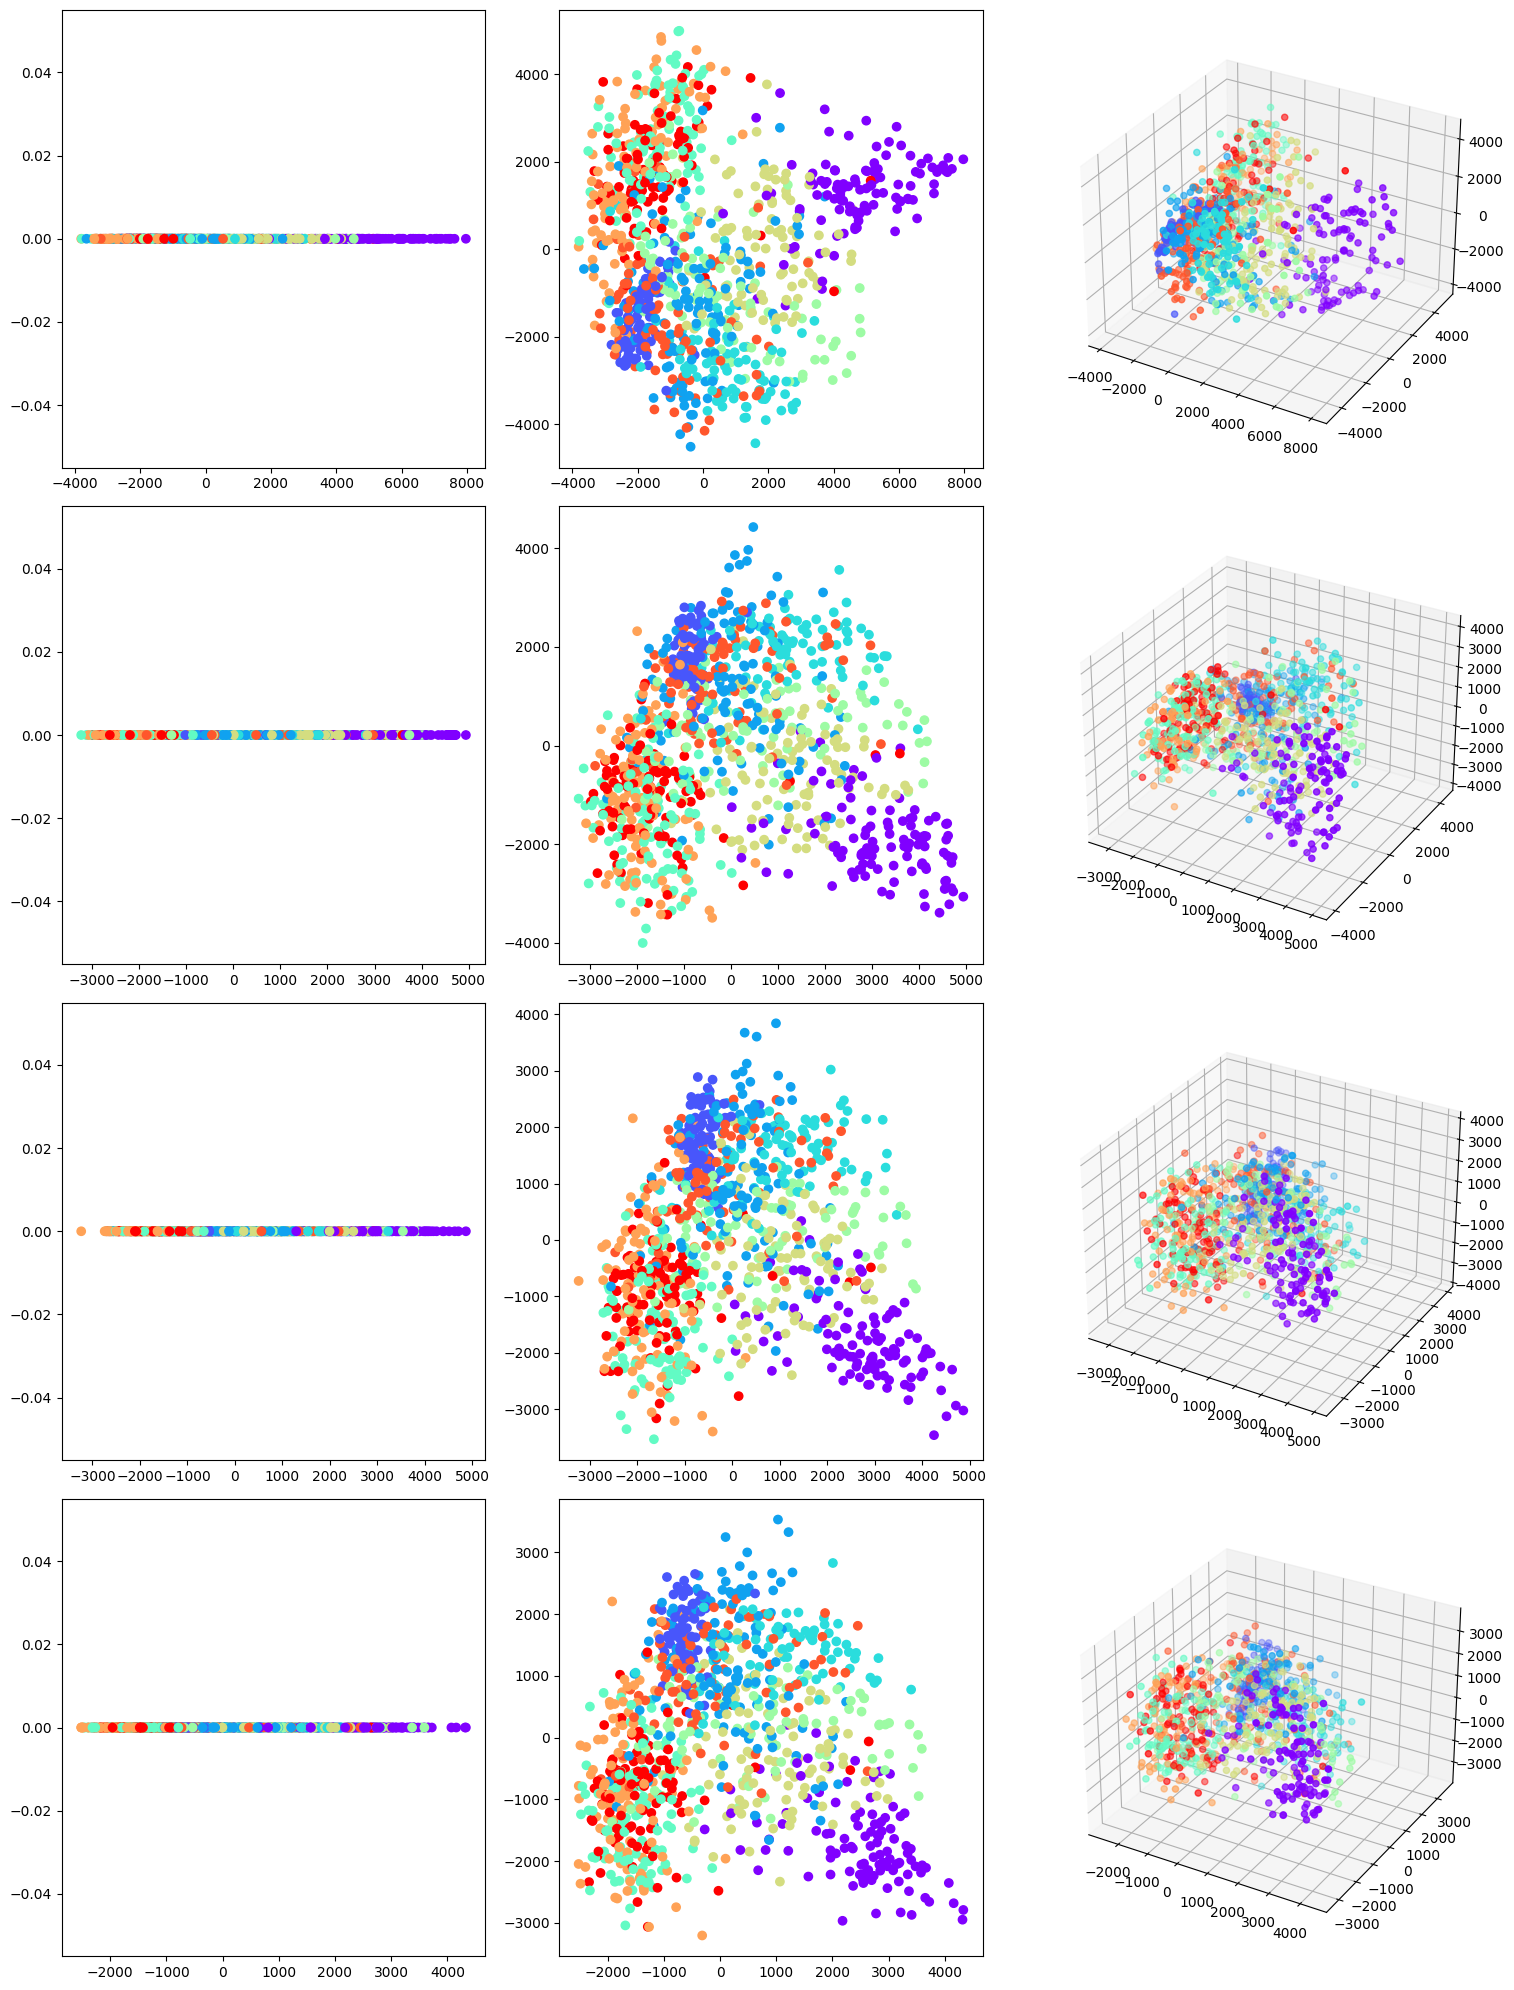

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(n_neighbors_values), len(n_components_values), figsize=(15, 5 * len(n_neighbors_values)))
sc = None 

for i, n_neighbors in enumerate(n_neighbors_values):
    for j, n_components in enumerate(n_components_values):
        data = embeddings[(n_neighbors, n_components)]
        
        if n_components == 1:
            ax = axes[i, j]
            sc = ax.scatter(data, np.zeros_like(data), c=y_subset, cmap='rainbow')
        elif n_components == 2:
            ax = axes[i, j]
            sc = ax.scatter(data[:, 0], data[:, 1], c=y_subset, cmap='rainbow')
        else: 
            fig.delaxes(axes[i, j])
            ax_3d = fig.add_subplot(len(n_neighbors_values), len(n_components_values), i * len(n_components_values) + j + 1, projection='3d')
            sc = ax_3d.scatter(data[:, 0], data[:, 1], data[:, 2], c=y_subset, cmap='rainbow')

plt.tight_layout()
plt.show()
